## PP22/H605
### Scope: Health and Medicare
### Topic: Blindness Detection
### Project Description:
#### Reports have shockingly revealed that there are 43 million people living with blindness and 295 million people living with moderate-to-severe visual impairment globally. Out of these, a huge 77% is completely preventable or treatable. 
### Objective:
#### To be able to detect and help put measures in place to prevent or treat blindness using Machine Learning

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2 as cv


## Read the csv file and perform EDA

In [2]:
train_label = pd.read_csv('../input/label-data/train.csv')
x = train_label['id_code']
y = train_label['diagnosis']

In [3]:
# Print top 5 rows
train_label.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [4]:
# Print information of train_label
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [5]:
train_label.describe(include = 'all')

id_code    diagnosis
count           3662  3662.000000
unique          3662          NaN
top     000c1434d8d7          NaN
freq               1          NaN
mean             NaN     1.126980
std              NaN     1.298409
min              NaN     0.000000
25%              NaN     0.000000
50%              NaN     1.000000
75%              NaN     2.000000
max              NaN     4.000000

In [6]:
# Shape of train_label
train_label.shape

(3662, 2)

In [7]:
# check duplication in id_code
train_label['id_code'].duplicated().any()

False

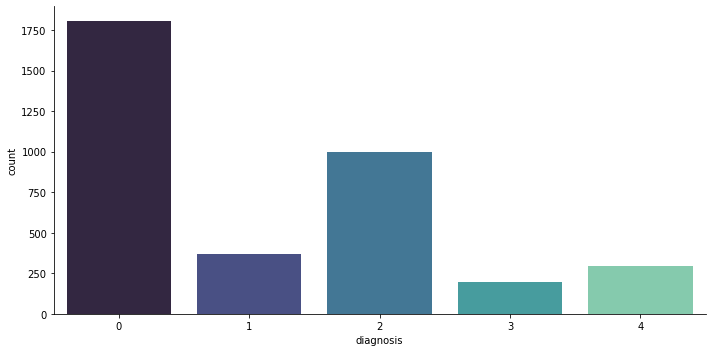

In [8]:
# plot categorical graph based on diagnosis class (0 = No DR, 1 – Mild , 2 – Moderate, 3 – Severe, 4 – Proliferative DR)
sns.catplot(x='diagnosis',data=train_label, kind="count",height=5, palette="mako", aspect=2)

In [9]:
# Total count of data based on the classes 0 to 4 
train_label.groupby('diagnosis').count()

id_code
diagnosis         
0             1805
1              370
2              999
3              193
4              295

### Split the dataset for train and validation

In [10]:
train_x, validation_x, train_y, validation_y = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(train_x.shape, train_y.shape, validation_x.shape, validation_y.shape)

(2929,) (2929,) (733,) (733,)


# Image Processing 

## Dispaly train image with it's Class label

In [11]:
size = 512
rand = 5

CPU times: user 2.62 s, sys: 268 ms, total: 2.89 s
Wall time: 2.92 s


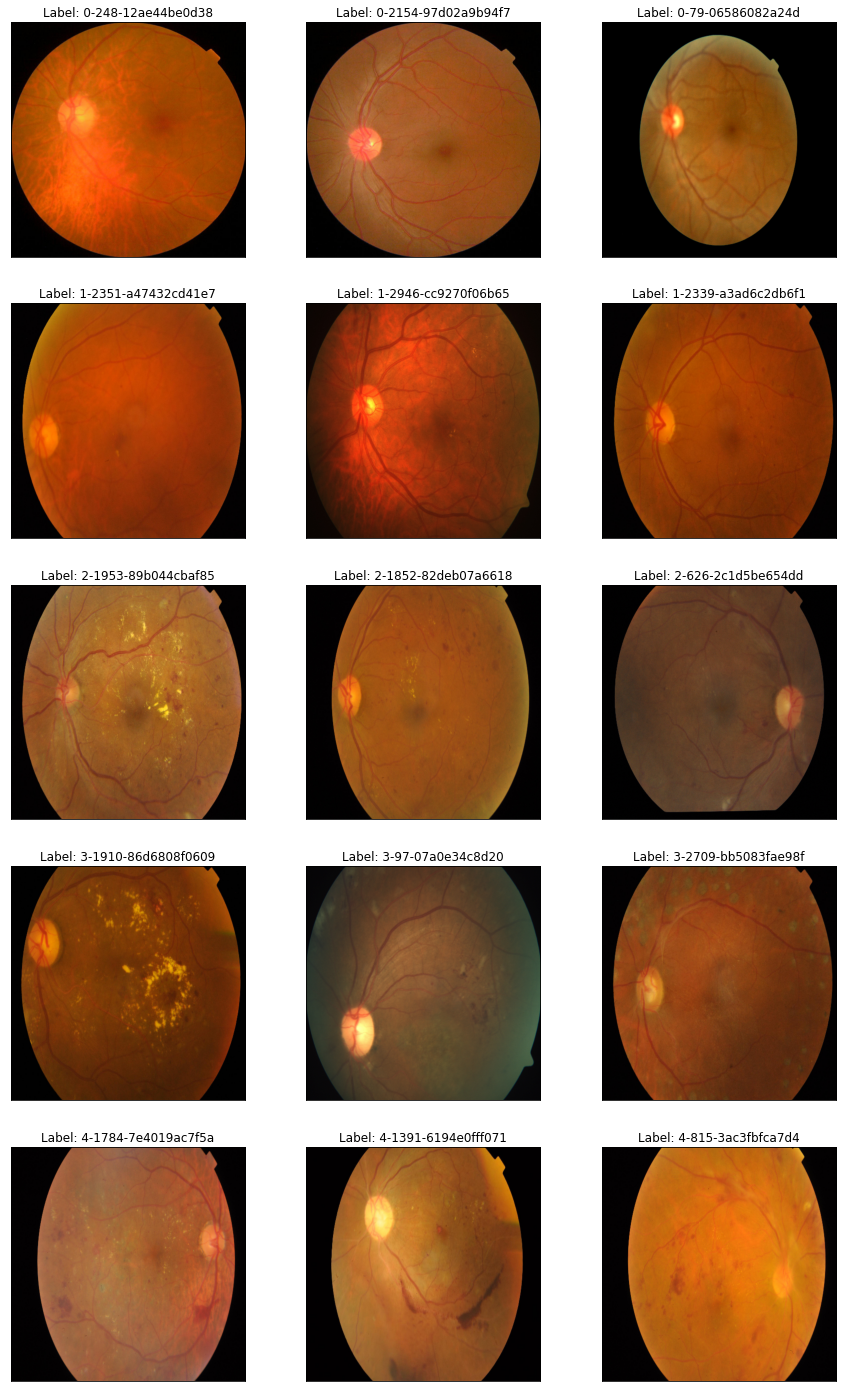

In [12]:
%%time

fig = plt.figure(figsize=(15,25))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_image = cv.cvtColor(train_image, cv.COLOR_BGR2RGB)
        train_image = cv.resize(train_image, (size,size))

        plt.imshow(train_image)
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        


## RGB to Gray

CPU times: user 2.34 s, sys: 103 ms, total: 2.44 s
Wall time: 2.32 s


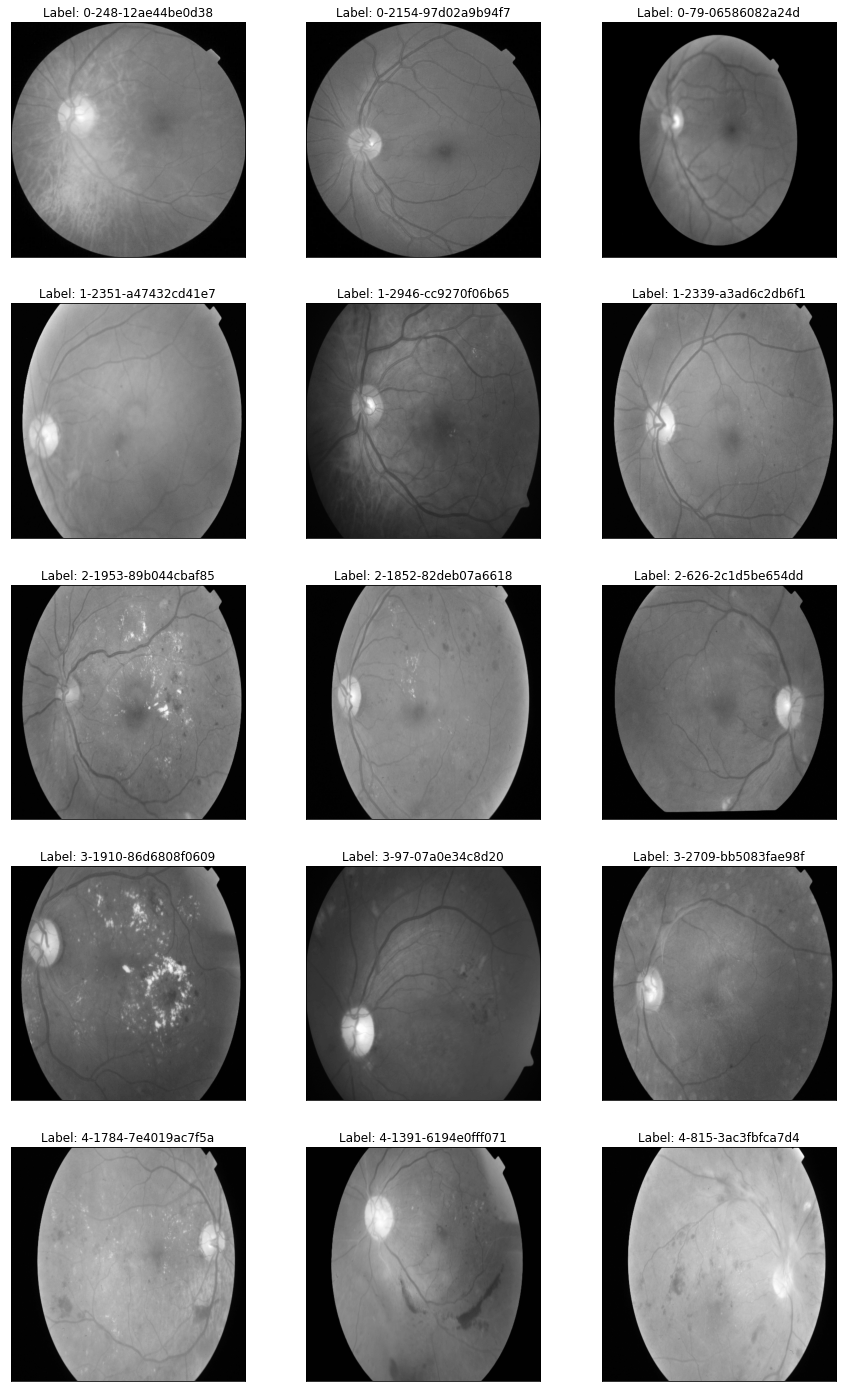

In [13]:
%%time

fig = plt.figure(figsize=(15,25))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_image = cv.cvtColor(train_image, cv.COLOR_BGR2GRAY)        
        train_image = cv.resize(train_image, (size,size))

        plt.imshow(train_image, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

## Weighted GaussianBlur for light

CPU times: user 46.4 s, sys: 165 ms, total: 46.5 s
Wall time: 14.1 s


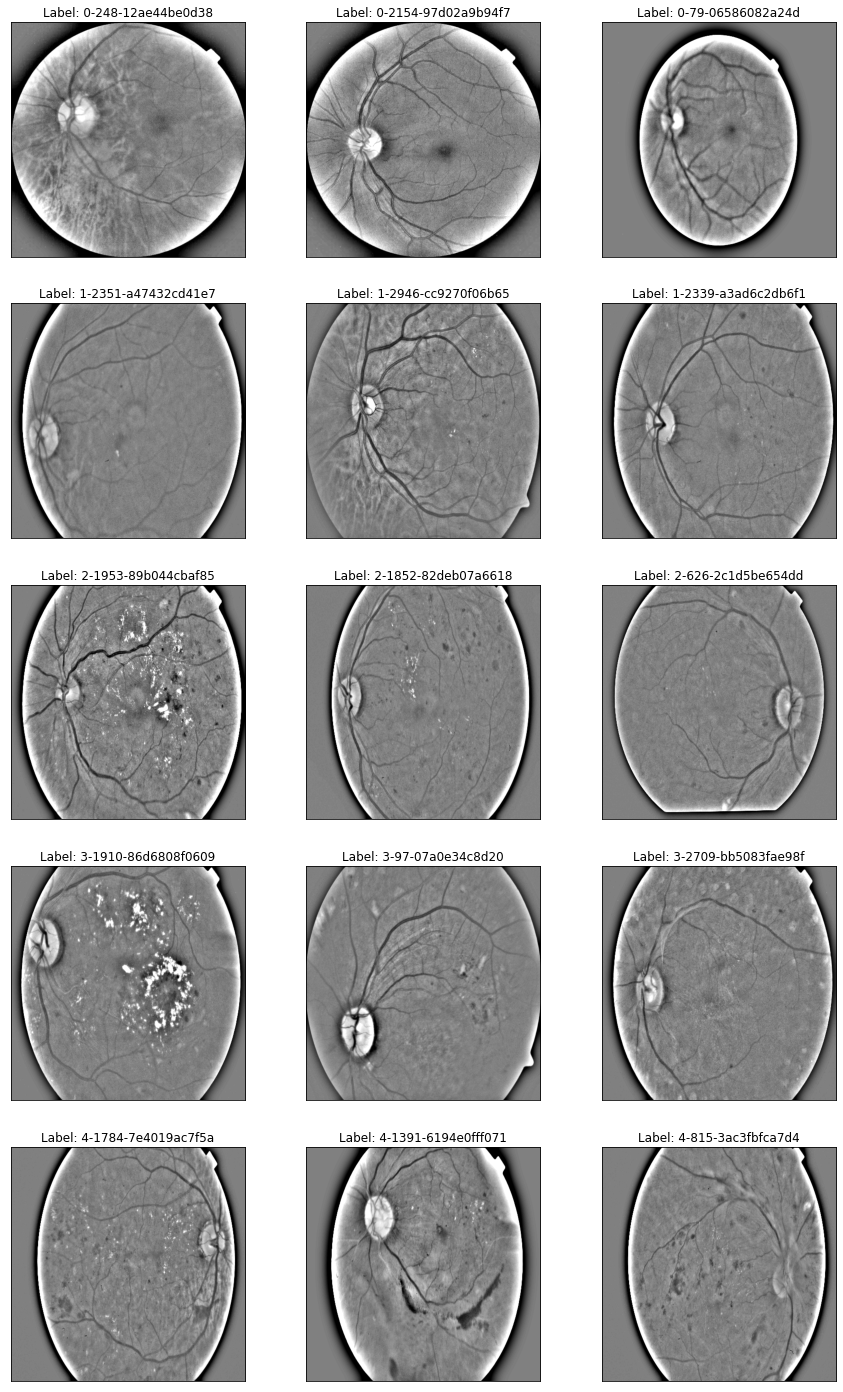

In [14]:
%%time

fig = plt.figure(figsize=(15,25))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_image = cv.cvtColor(train_image, cv.COLOR_BGR2GRAY)
        train_image=cv.addWeighted (train_image,4, cv.GaussianBlur( train_image , (0,0) , size/10) ,-4 ,128)
        
        train_image = cv.resize(train_image, (size,size))

        plt.imshow(train_image, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

## Erosion (Remove boundary pixels)

CPU times: user 2.66 s, sys: 143 ms, total: 2.8 s
Wall time: 2.63 s


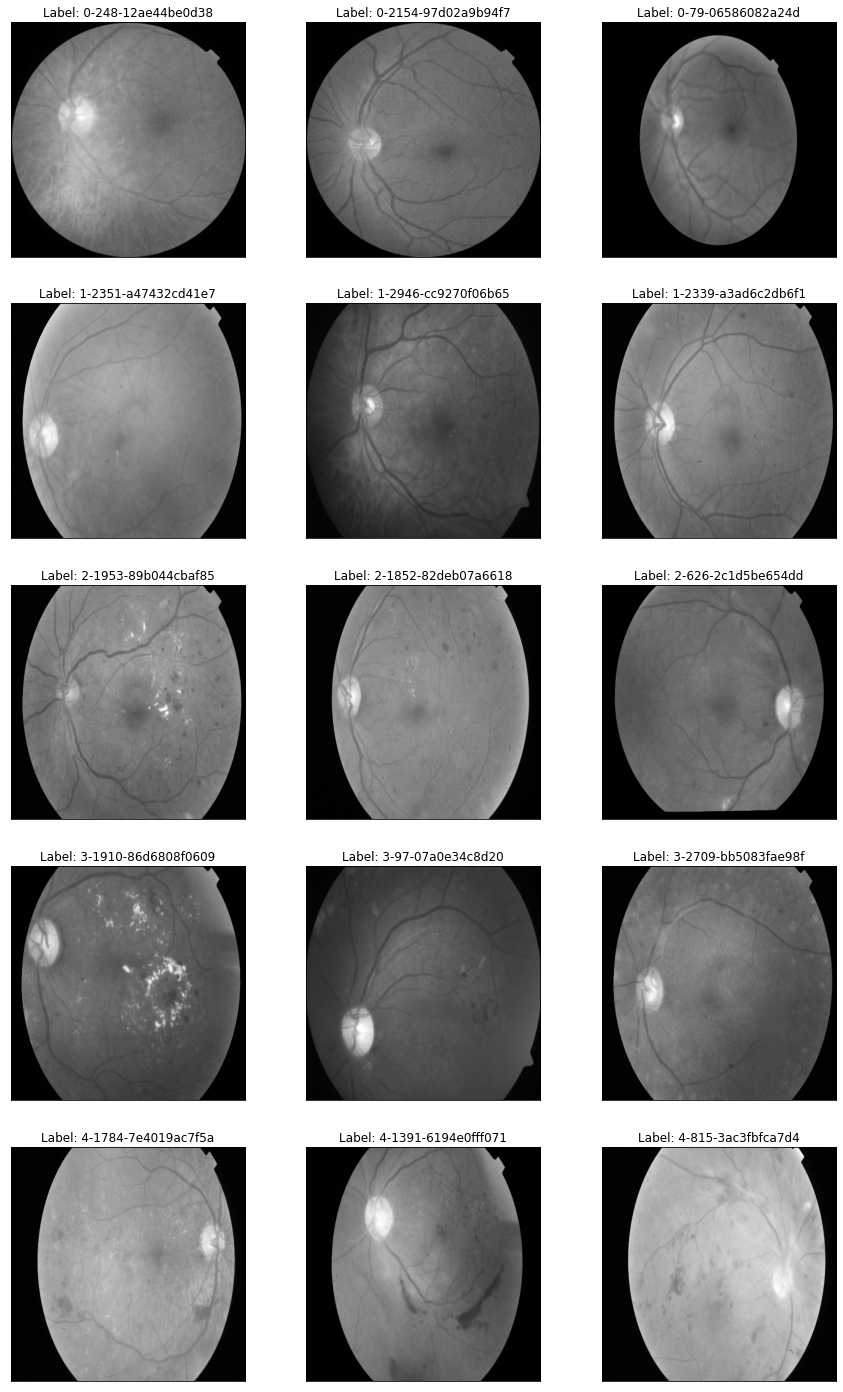

In [15]:
%%time

fig = plt.figure(figsize=(15,25))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_image = cv.cvtColor(train_image, cv.COLOR_BGR2GRAY)
        
        kernel = np.ones((5,5),np.uint8)  
        train_image = cv.erode(train_image, kernel, iterations=1)
        train_image = cv.resize(train_image, (size,size))


        plt.imshow(train_image, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

## Dilation (Add pixel when pixel missing in input)

CPU times: user 2.52 s, sys: 126 ms, total: 2.65 s
Wall time: 2.47 s


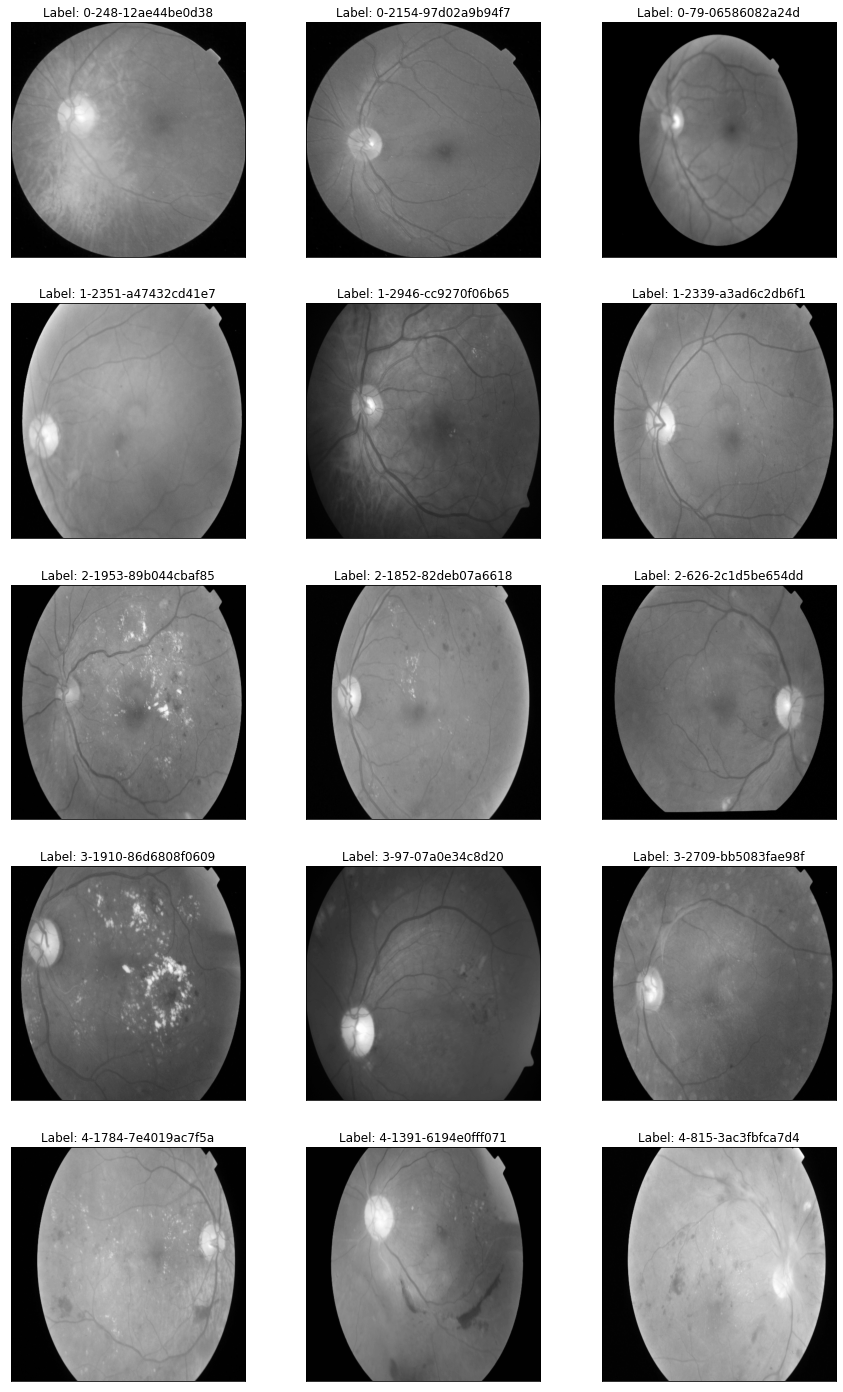

In [16]:
%%time

fig = plt.figure(figsize=(15,25))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_image = cv.cvtColor(train_image, cv.COLOR_BGR2GRAY)
        
        kernel = np.identity((5),np.uint8)  
        train_image = cv.dilate(train_image, kernel, iterations=1)

        train_image = cv.resize(train_image, (size,size))


        plt.imshow(train_image, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

## Seperation of Green Channel from BGR

CPU times: user 2.45 s, sys: 142 ms, total: 2.59 s
Wall time: 2.4 s


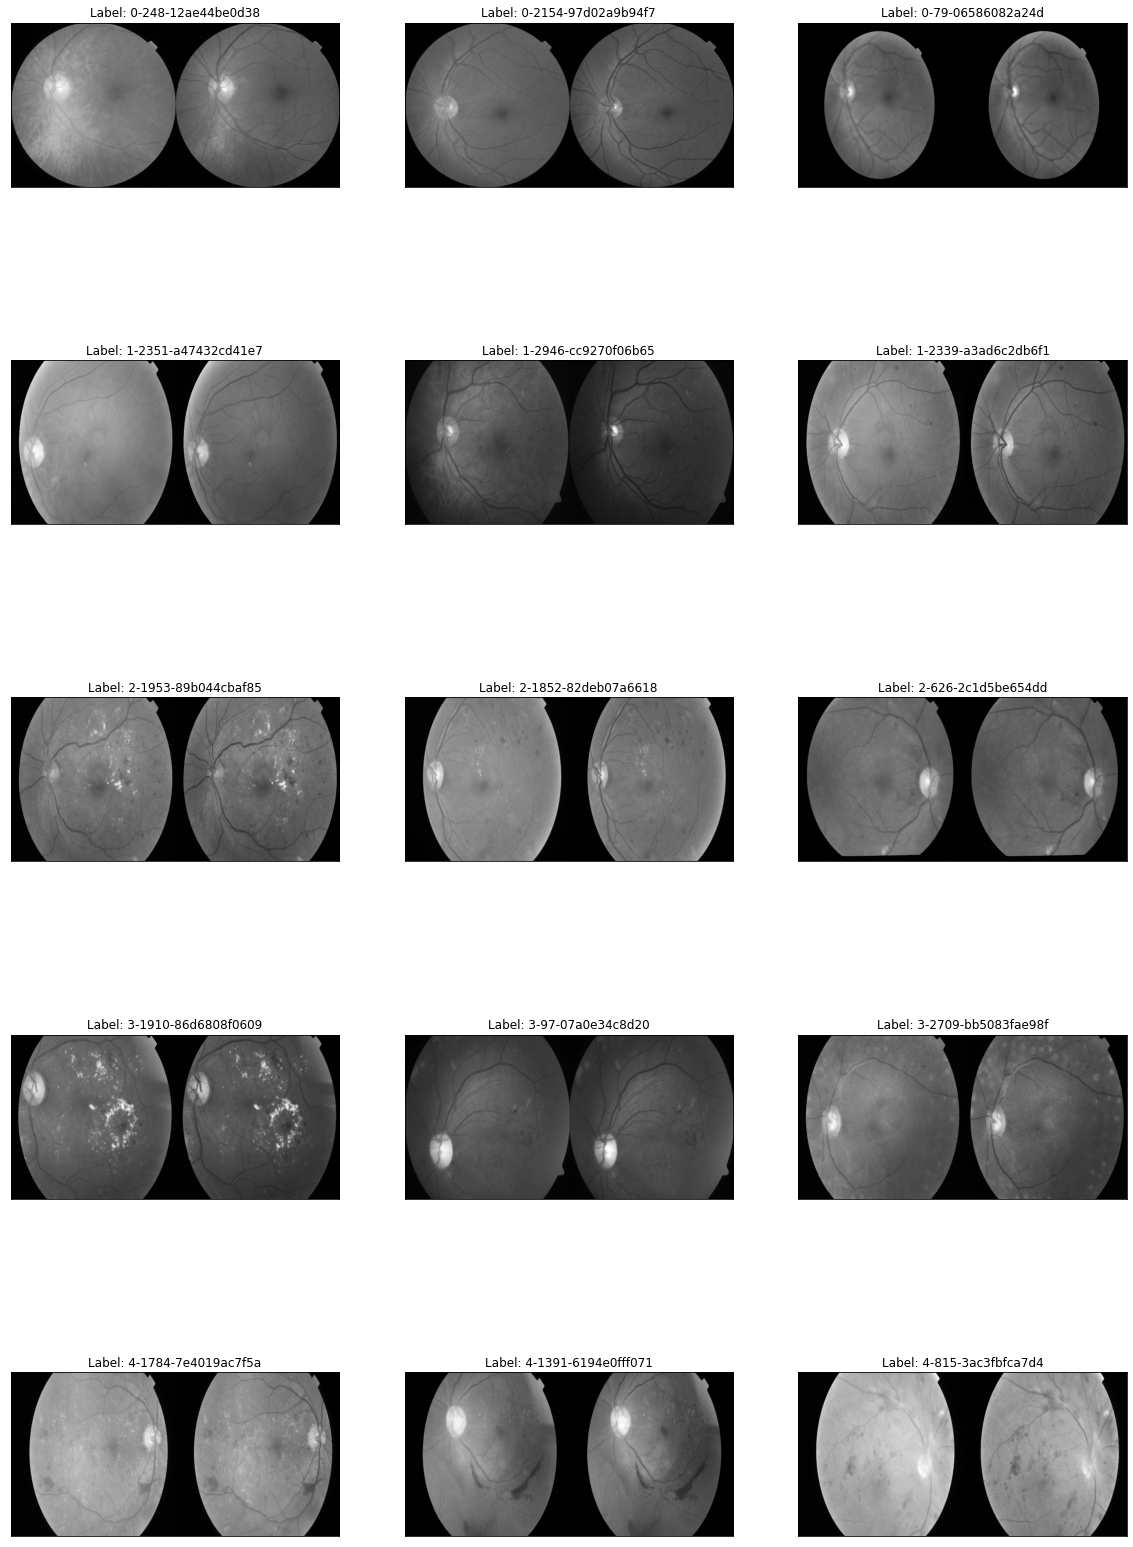

In [17]:
%%time

fig = plt.figure(figsize=(20,30))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_img = cv.cvtColor(train_image, cv.COLOR_BGR2GRAY)

        green_channel = train_image[:,:,1]

        green_image = cv.resize(green_channel, (size,size))
        train_img = cv.resize(train_img, (size,size))

        res = np.hstack((train_img, green_image))

        plt.imshow(res, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

## Image Histogram Equlization (Contrast Enhancement)

CPU times: user 2.8 s, sys: 66.3 ms, total: 2.87 s
Wall time: 2.63 s


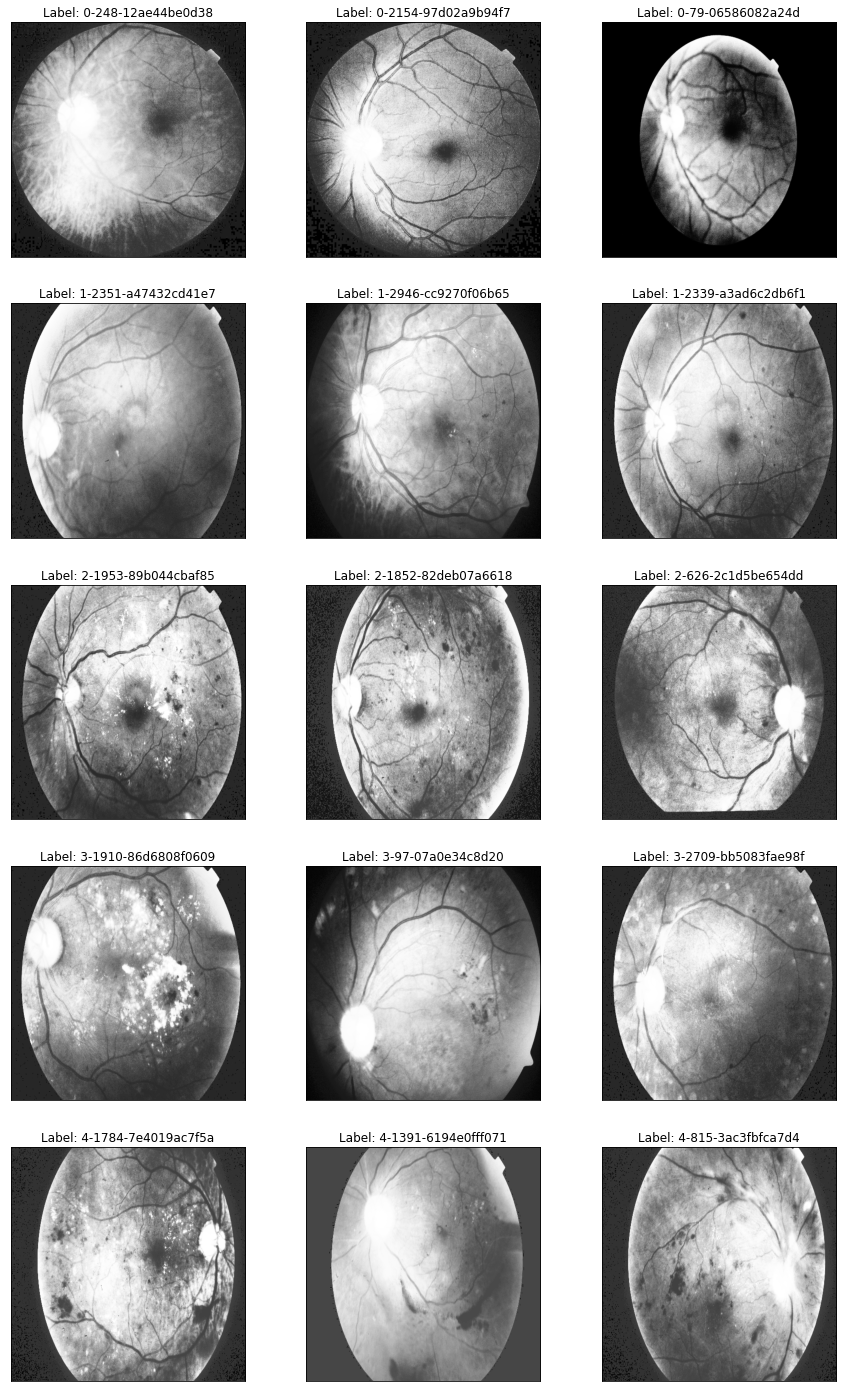

In [18]:
%%time

fig = plt.figure(figsize=(15,25))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        train_image = cv.cvtColor(train_image, cv.COLOR_BGR2GRAY)
        equ_image = cv.equalizeHist(train_image)

        #train_image = cv.resize(train_image, (size,size))
        equ_image = cv.resize(equ_image, (size,size))

        #res = np.hstack((train_image, equ_image))

        #plt.imshow(res, cmap = 'gray')
        plt.imshow(equ_image, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

## Microaneurysms and Hemorrhages Detection

CPU times: user 2.76 s, sys: 145 ms, total: 2.91 s
Wall time: 2.65 s


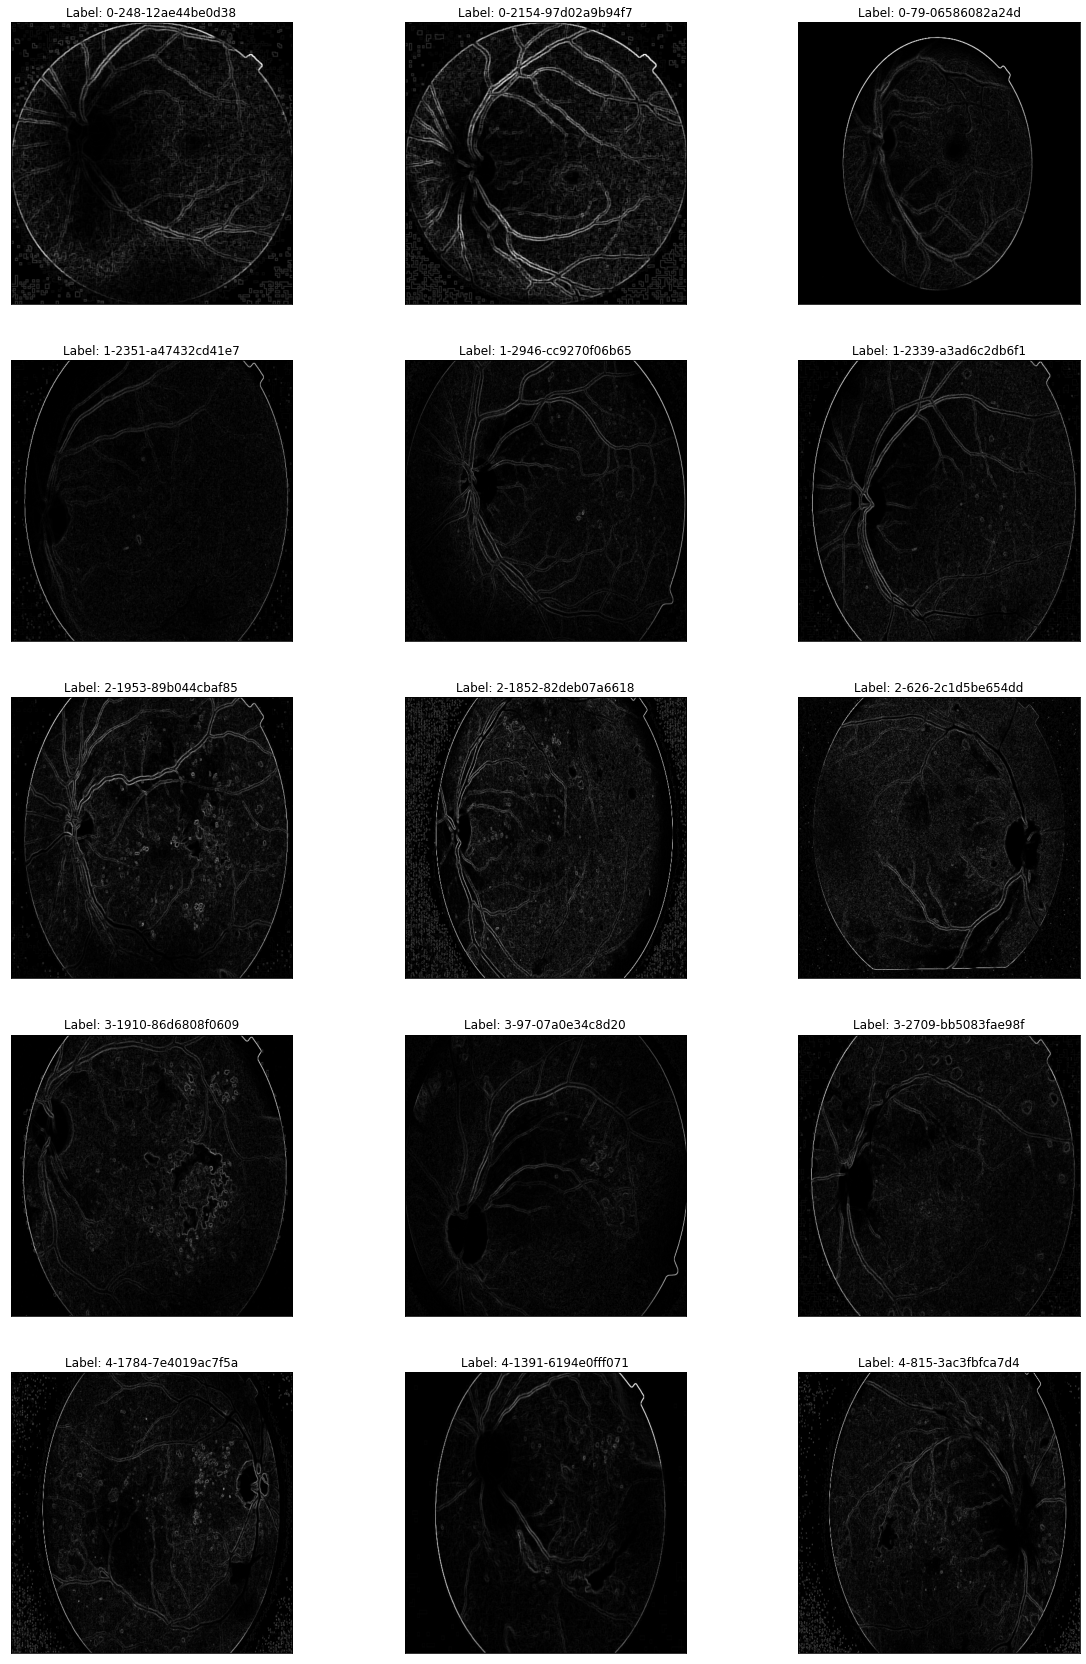

In [19]:
%%time

fig = plt.figure(figsize=(20,30))
for label in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train_label.loc[train_label['diagnosis'] == label].sample(3, random_state=rand).iterrows()):
        ax = fig.add_subplot(5, 3, label * 3 + i + 1, xticks=[], yticks=[])
        path=f"../input/dataset-hdsc/train_images/train_images/{row['id_code']}.png"
        train_image = cv.imread(path)
        green_channel = train_image[:,:,1]
        equ_image = cv.equalizeHist(green_channel)
        complement = cv.bitwise_not(equ_image)
        
        # Morphological operation
        kernel = np.ones((5,5),np.uint8)  
        erode_image = cv.erode(complement, kernel, iterations=1)
        dilate_image = cv.dilate(erode_image, kernel, iterations=1)
        morph = cv.morphologyEx(dilate_image, cv.MORPH_OPEN, kernel)
        morph = cv.morphologyEx(morph, cv.MORPH_CLOSE, kernel)
        morph = cv.morphologyEx(morph, cv.MORPH_GRADIENT, kernel)


        res = cv.resize(morph, (size,size))

        plt.imshow(res, cmap = 'gray')
        ax.set_title('Label: %d-%d-%s' % (label, idx, row['id_code']) )
        

### Test dataset

In [20]:
test_label = pd.read_csv('../input/label-data/test.csv')
test_label.head()

id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4

In [21]:
test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_code  1928 non-null   object
dtypes: object(1)
memory usage: 15.2+ KB


In [22]:
test_label.shape

(1928, 1)

In [23]:
test_label.head()

id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4